In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [96]:
import pandas as pd
import numpy as np

In [97]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split   
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
pc = PCA(n_components=2)

In [100]:
x = pc.fit_transform(x_train)

In [102]:
xt = pc.transform(x_test)

In [104]:
lr = LogisticRegression()
lr.fit(x, y_train)

LogisticRegression()

In [106]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [[ 3.19103336 -0.69005041]]
Intercept: [1.04557533]


In [108]:
m = -1 * (lr.coef_[0][0] / lr.coef_[0][1])
b = -1 * (lr.intercept_ / lr.coef_[0][1])


In [110]:
x_input1=np.linspace(-3,3,100)
y_input1=m*x_input+b
print(x_input1.shape)
print(y_input1.shape)


(100,)
(80,)


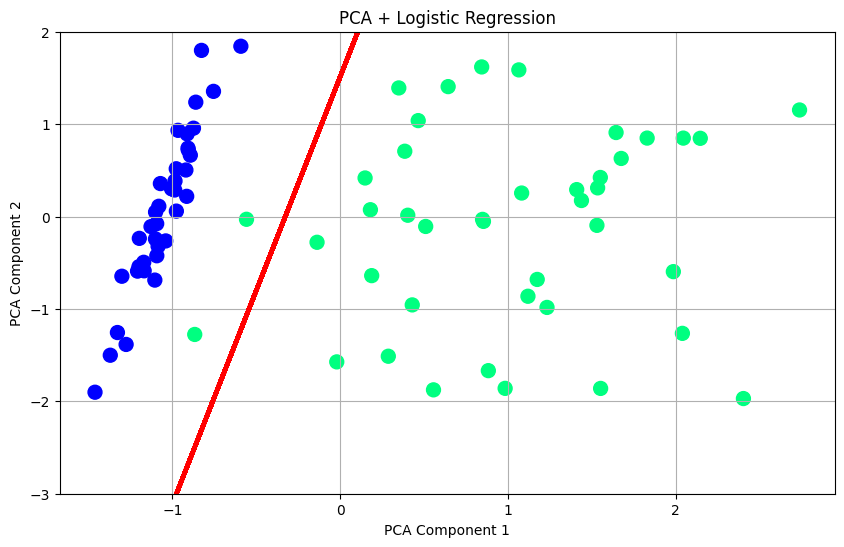

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)

plt.scatter(x[:, 0], x[:, 1], c=y_train, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.title("PCA + Logistic Regression")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X, y)



LogisticRegression()

In [119]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])


In [121]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m * x_input1 + b

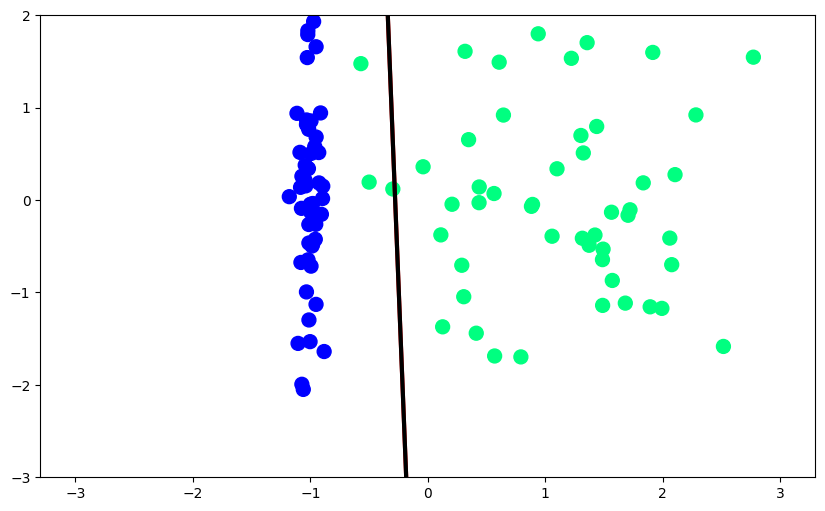

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(x_input1, y_input1, color='red', linewidth=3)
plt.plot(x_input1, y_input1, color='black', linewidth=3)  
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3.0, 2.0)
plt.show()

In [129]:
def perceptron(X, y):
    m = []
    b = []

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

   
    for i in range(200):
        j = np.random.randint(0, 100)  # random sample
        y_hat = step(np.dot(X[j], weights))
        
        # Weight update
        weights = weights + lr * (y[j] - y_hat) * X[j]

        # Calculate slope and intercept from weights
        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))

    return m, b

In [ ]:
m,b=perceptron(X,y)

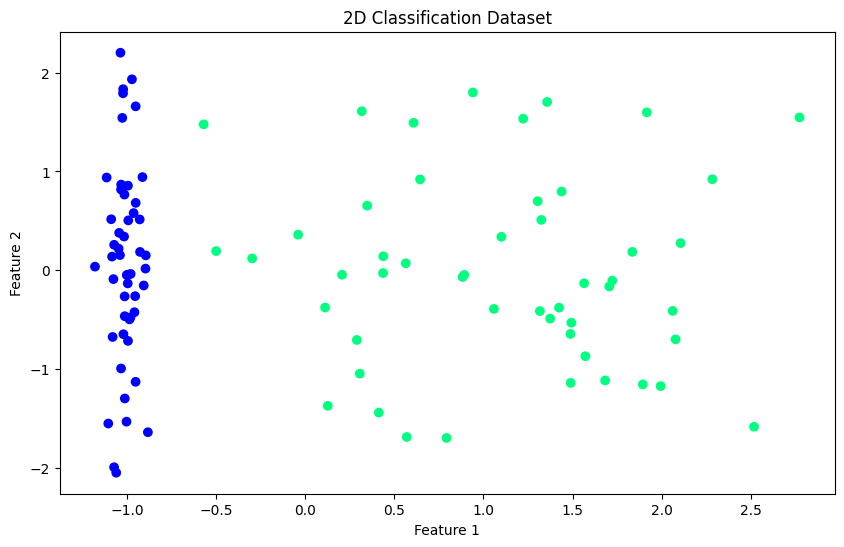

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1,
                           random_state=11)


plt.figure(figsize=(10, 6))  
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("2D Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [14]:
X

array([[ 1.70603336, -0.16419295],
       [-1.07990563, -0.67502027],
       [-0.95109304, -1.1288944 ],
       [ 1.57192554, -0.86986194],
       [ 1.72284546, -0.10514925],
       [ 2.77331116,  1.5466061 ],
       [-0.49895747,  0.1944292 ],
       [-1.02564357,  1.54220922],
       [-0.99504744, -0.1329099 ],
       [ 1.56513799, -0.13155348],
       [-1.01200134, -0.46456606],
       [-0.9957093 , -0.04480262],
       [-1.07180882, -1.99357153],
       [ 1.68271721, -1.11523722],
       [ 1.30464636,  0.69914084],
       [ 2.28410044,  0.92157523],
       [ 1.35749248,  1.70372182],
       [ 0.29011415, -0.70541403],
       [ 1.10102701,  0.33871394],
       [-1.10423992, -1.55107946],
       [ 1.91669466,  1.5980499 ],
       [-0.95034603,  0.68212971],
       [-1.17880174,  0.03679475],
       [-0.92616775,  0.18566325],
       [-0.95352371, -0.26196107],
       [-1.02153931,  1.7915311 ],
       [ 0.79338923, -1.69734212],
       [ 0.31800075,  1.60987398],
       [-1.08797826,

In [15]:
np.ones(X.shape[1])

array([1., 1.])

In [50]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    weights=np.ones(X.shape[1])
    coef = [0] * len(X[0])
    lr=0.1

    for i in range(1000):
       j=np.random.randint(0,100)
       y_hat=step(np.dot(X[j],weights))
       weights=weights+lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [46]:
def step(z):
    return 1 if z>0 else 0

In [51]:
intercept_coef = perceptron(X, y)

print(coef)
print(intercept_)


[0, 0]
0
